# DATA

This is a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

'Daily Time Spent on Site': consumer time on site in minutes
'Age': cutomer age in years
'Area Income': Avg. Income of geographical area of consumer
'Daily Internet Usage': Avg. minutes a day consumer is on the internet
'Ad Topic Line': Headline of the advertisement
'City': City of consumer
'Male': Whether or not consumer was male
'Country': Country of consumer
'Timestamp': Time at which consumer clicked on Ad or closed window
'Clicked on Ad': 0 or 1 indicated clicking on Ad

# Import lib

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df= pd.read_csv('advertising.csv')

In [3]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


# Exploratory data analysis

In [6]:
# check for missing data
df.isnull()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

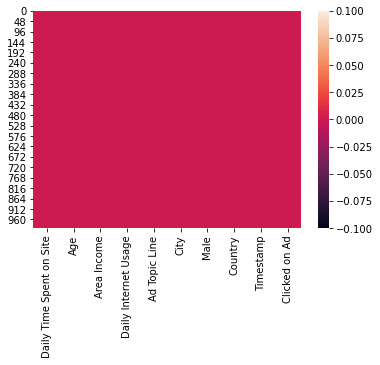

In [7]:
sns.heatmap(df.isnull()) # no missing data

<AxesSubplot:xlabel='Clicked on Ad', ylabel='count'>

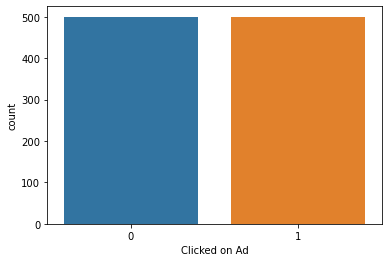

In [8]:
# check count of clicked and not clicked on ad people
sns.countplot(x='Clicked on Ad', data=df)
# turns out there are 500 people who clicked and 500 who didnt clicked

<AxesSubplot:xlabel='Clicked on Ad', ylabel='count'>

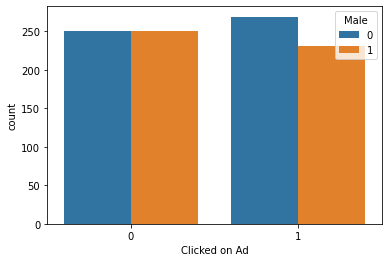

In [9]:
# lets add sex feature here
sns.countplot(x='Clicked on Ad', hue='Male', data=df)
# shows people who cliked on add are more females

C:\Users\Vanshika\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

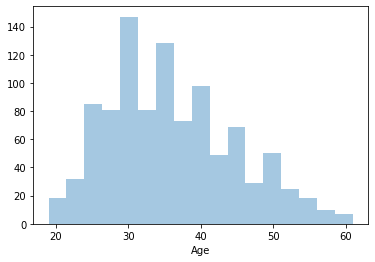

In [12]:
# check the age of people in our analysis
sns.distplot(df['Age'], kde=False)
# more people are in age of 30 to 40

<AxesSubplot:xlabel='Clicked on Ad', ylabel='Age'>

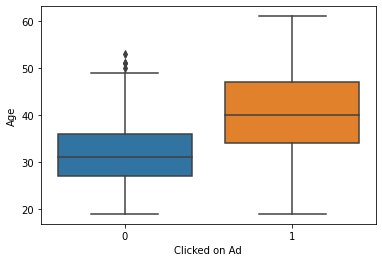

In [14]:
sns.boxplot(x='Clicked on Ad', y='Age', data=df)
# people who clicked on ad are in avg age of 40

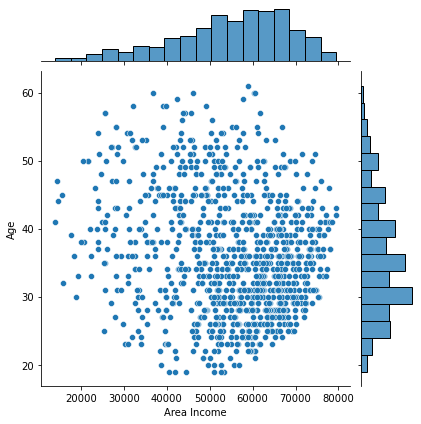

In [15]:
# area income vs age
sns.jointplot(x= 'Area Income', y='Age', data=df)
# makes sense that people start earning in their 20's and earns more till their 40's for most of the people

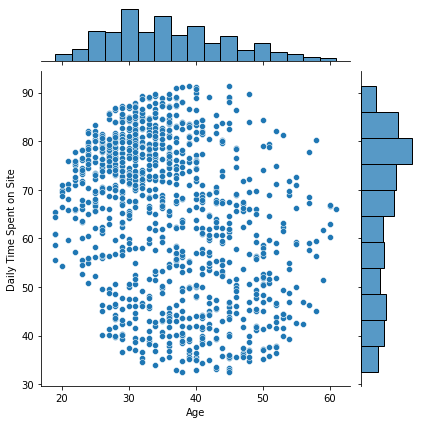

In [17]:
sns.jointplot(x='Age', y= 'Daily Time Spent on Site', data=df)
# similar trend for daily time spent vs age- people in their 20's till 40's spent more time. however it is more scattered

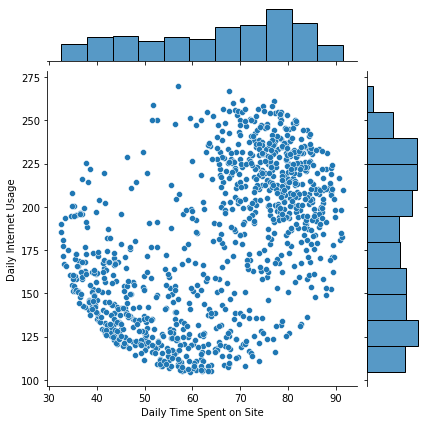

In [19]:
sns.jointplot(x='Daily Time Spent on Site', y='Daily Internet Usage', data=df)

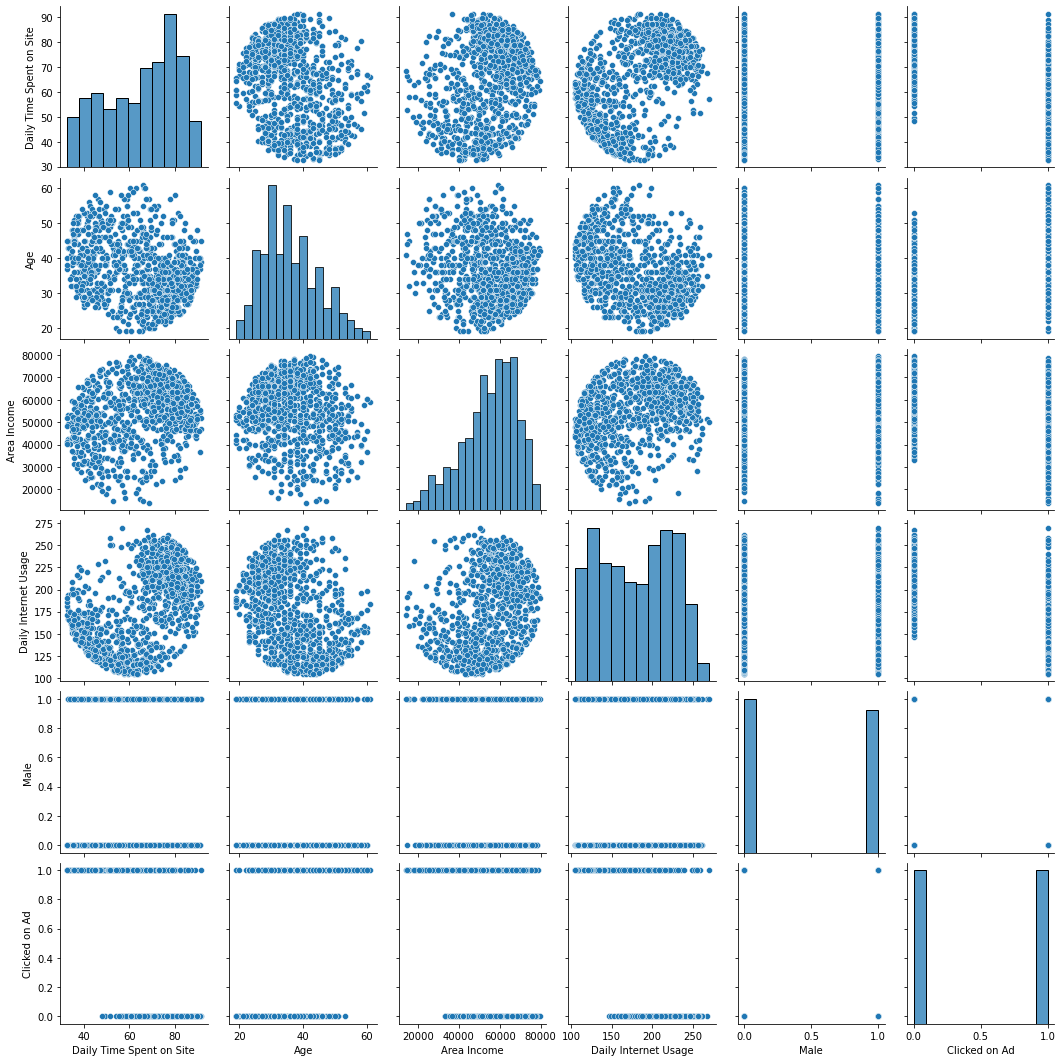

In [20]:
sns.pairplot(data=df) # For relationship b/w every pair

# LOGISTIC REGRESSION

In [21]:
df.columns


Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [22]:
X= df[['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage','Male']]

In [23]:
print(X)

     Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  Male
0                       68.95   35     61833.90                256.09     0
1                       80.23   31     68441.85                193.77     1
2                       69.47   26     59785.94                236.50     0
3                       74.15   29     54806.18                245.89     1
4                       68.37   35     73889.99                225.58     0
..                        ...  ...          ...                   ...   ...
995                     72.97   30     71384.57                208.58     1
996                     51.30   45     67782.17                134.42     1
997                     51.63   51     42415.72                120.37     1
998                     55.55   19     41920.79                187.95     0
999                     45.01   26     29875.80                178.35     0

[1000 rows x 5 columns]


In [24]:
y= df[['Clicked on Ad']]

In [25]:
print(y)

     Clicked on Ad
0                0
1                0
2                0
3                0
4                0
..             ...
995              1
996              1
997              1
998              0
999              1

[1000 rows x 1 columns]


In [26]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test,y_train, y_test= train_test_split(X,y,test_size=0.3, random_state=101)

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
logmodel= LogisticRegression()

In [35]:
logmodel.fit(X_train, y_train)

C:\Users\Vanshika\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

PREDICT

In [36]:
predictions= logmodel.predict(X_test)

# Evaluate

In [38]:
from sklearn.metrics import classification_report

In [42]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300

